# **Exploratory Data Analysis Lab**


Now we will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


***


In [1]:
import pandas as pd
import seaborn as sb

In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### How the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Distribution curve for the column `ConvertedComp`


<AxesSubplot:ylabel='Density'>

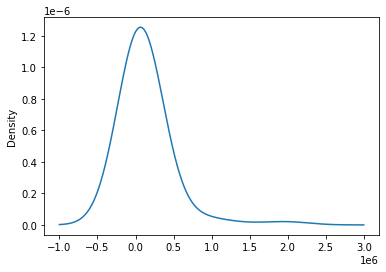

In [3]:
df['ConvertedComp'].plot.kde(bw_method=1)

Histogram for the column `ConvertedComp`.


<AxesSubplot:ylabel='Frequency'>

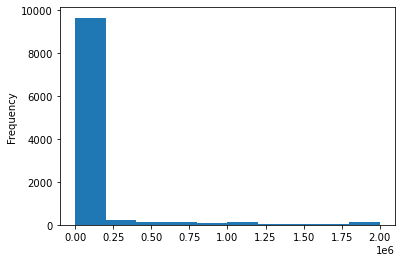

In [4]:
df['ConvertedComp'].plot.hist()

The median of the column `ConvertedComp` os 57,745


In [5]:
df['ConvertedComp'].median()

57745.0

Number of male respondents

In [6]:
df['Gender'].value_counts()[0]

10480

Median ConvertedComp of female responders


In [7]:
df.loc[df['Gender']=='Woman']['ConvertedComp'].median()


57708.0

In [8]:
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


<AxesSubplot:ylabel='Frequency'>

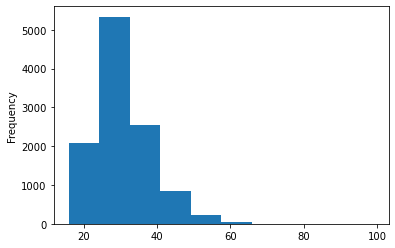

In [9]:
df['Age'].plot.hist()


## Outliers


### Finding outliers


<AxesSubplot:>

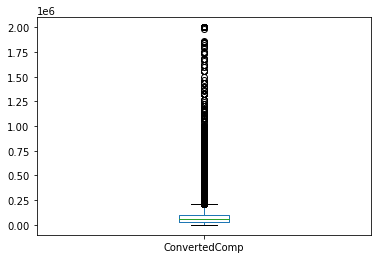

In [10]:
df['ConvertedComp'].plot.box()

Inter Quartile Range for the column `ConvertedComp`.


In [11]:
n= df['ConvertedComp'].quantile(.25)
m = df['ConvertedComp'].quantile(.75)
print(m-n)


73132.0


Upper and lower bounds.


In [12]:
lower = n - (1.5*(m-n))
upper = m + (1.5*(m-n))
print(lower)
print(upper)

-82830.0
209698.0


Number of outliers in the `ConvertedComp` column.


In [13]:
outlier =[]
for x in df['ConvertedComp']:
    if ((x> upper) or (x<lower)):
         outlier.append(x)
print(len(outlier))

879


Creating a new dataframe by removing the outliers from the `ConvertedComp` column.


59848.42843866171


<AxesSubplot:>

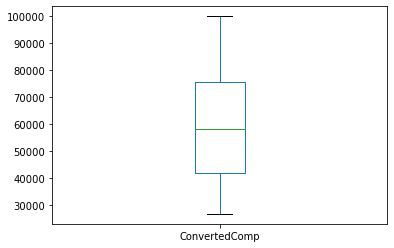

In [14]:
x = df['ConvertedComp']
x = x[x.between(x.quantile(.25), x.quantile(.75))] # without outliers
print(x.mean())
x.plot.box()

## Correlation


### Finding correlation


Finding the correlation between `Age` and all other numerical columns.


In [15]:
df.corrwith(df['Age'])

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
dtype: float64

AttributeError: 'QuadMesh' object has no property 'annotated'

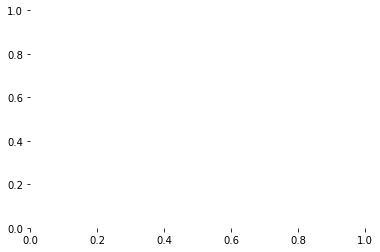

In [19]:
corr = df.corr()
sb.heatmap(corr, cmap='GnBu', annotated=True)

| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
